# SKYFAST: Tutorial
### This tutorial shows how to use SKYFAST, a Python code based on FIGARO (Rinaldi&Del Pozzo, 2022) for the rapid localization of gravitational wave hosts

#### This tutorial is based on a previous version written by Stefano Rinaldi

In [1]:
import figaro
from skyfast.skyfast import skyfast
from tqdm import tqdm
from skyfast.coordinates import celestial_to_cartesian
from figaro.load import load_single_event
samples, name = load_single_event('data/GW170817_noEM.txt')

In [2]:
glade_file = 'data/glade+.hdf5'


In [3]:
ngc_4993_position = [3.446131245232759266e+00, -4.081248426799181650e-01]
dens = skyfast(100, glade_file=glade_file,
                   true_host=ngc_4993_position,
                     entropy = True, 
                    n_entropy_MC_draws=1e3)#INSTANCE OF THE CLASS SKYFAST


In [4]:
cart_samp = celestial_to_cartesian(samples)


 52%|█████▏    | 2597/5042 [00:31<00:05, 442.31it/s]

make_sk_0
[4.13487159e-013 1.26601966e-013 9.65366462e-016 ... 3.17564687e-204
 9.49829464e-227 1.60774008e-250] 0.015467411826151294
ev_sky_1
err1
ev_sky_2
ev_sky_3
ev_sky_4
ev_sky_5
make_sk_1


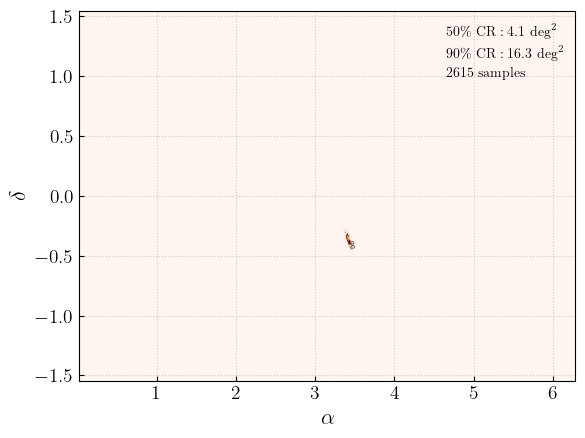

now [3.43247696 3.43618678 3.44613125 3.42556739 3.44065482 3.45036594
 3.43339425 3.44138786 3.44643186 3.45035885 3.43861287 3.44395349
 3.44389266 3.44404076 3.43667969 3.43641367 3.43436993 3.43719907
 3.39040679 3.39040679 3.42194489 3.39049835 3.43941564 3.43368178
 3.43450242 3.42691908 3.43449381 3.45915531 3.37224905 3.43010228]


100%|██████████| 5042/5042 [00:39<00:00, 129.24it/s]


In [5]:
for i in tqdm(range(len(cart_samp))):
        dens.intermediate_skymap(cart_samp[i])

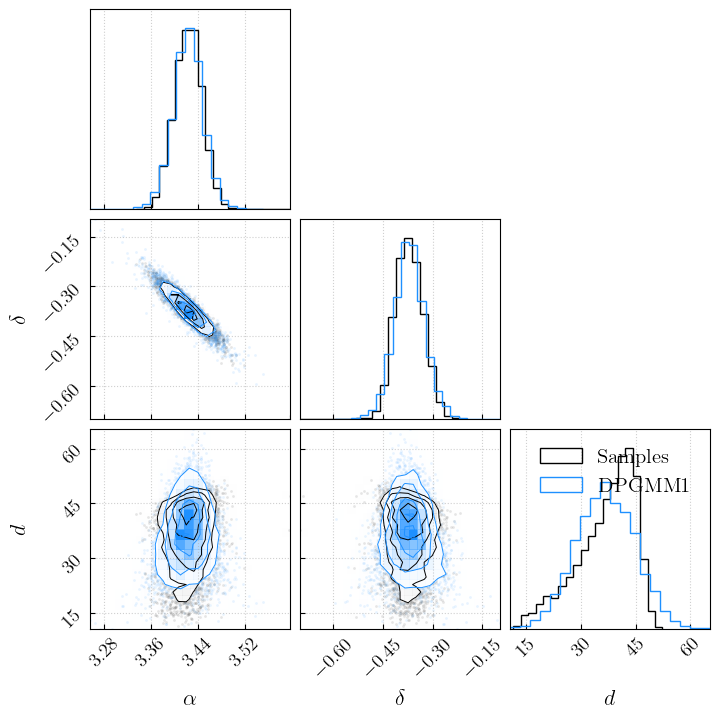

make_sk_0
[6.81404350e-014 1.52083794e-016 3.62065371e-021 ... 7.75061864e-243
 1.06811391e-271 2.98820282e-302] 0.0159909816337087
ev_sky_1
err1
ev_sky_2
ev_sky_3
ev_sky_4
ev_sky_5
make_sk_1


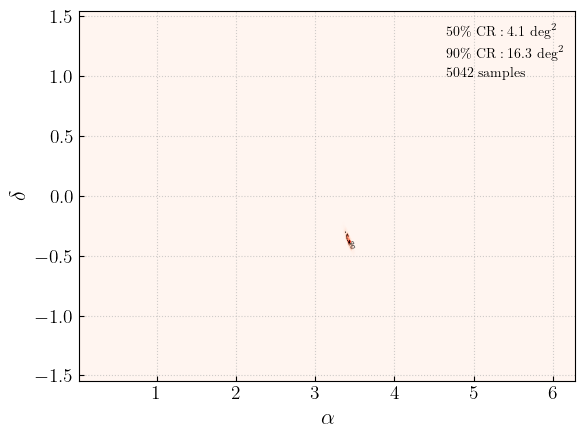

now [3.43247696 3.43618678 3.44613125 3.42556739 3.43339425 3.45036594
 3.44065482 3.44138786 3.44643186 3.45035885 3.43861287 3.44395349
 3.44404076 3.44389266 3.43719907 3.43641367 3.43436993 3.43667969
 3.39040679 3.39040679 3.42194489 3.43450242 3.39049835 3.43449381
 3.43941564 3.42691908 3.43368178 3.45915531 3.37224905 3.48105919]


In [6]:
dens.plot_samples(samples)
dens.make_entropy_plot()

dens.make_skymap(final_map = True)
dens.make_volume_map(final_map = True, n_gals=30)